##  Study on how to give initial data. 

We want to have a very isotropic data with a given frequency, or perhaps a distribution (thermal?) for $phi$ and its time derivative. Here
We do in 2dim.

We first create a distribution of values on Fourier space both for $ϕ $ and its time derivative, $\phi_t$.
I think we need a thermal distribution, that is we fix a temperature and put particles at that temperature.
That is we shall use the $\omega = |k|$ rule, we take positive so as to have particles and not antiparticles.



In [1]:
using Plots
using Distributions
using FFTW
using LinearAlgebra
using Revise
using Base.Threads
using HDF5

In [3]:
includet("../PIC/PIC-1D/aux_functions/inidat_aux_functions.jl")
includet("../PIC/PIC-1D/aux_functions/aux_functions.jl")
includet("local_aux_functions.jl")

We first look at the scheme for a distribution which resembles a delta function $k$ in Fourier space.
It gives a rather homogeneous distribution is space.

In [4]:
#J = (501,501,501)
J = (240,240,240)
Box_x = [-120.0, 120.0, -120.0, 120.0, -120.0, 120.0]
dx = differentials(Box_x,J)
κ = 2π./(Box_x[2:2:end] - Box_x[1:2:end-1])
V = volume(Box_x)
ϕ = Array{ComplexF64}(undef,J...)
ϕ_t = copy(ϕ)
#g = copy(ϕ)
#g_t = copy(ϕ)
#g_p = copy(ϕ)

m = 1
m2 = m^2

N = 1000 #number of particles
 
# k0= 500; δ = 1000 # para J=2001
k0 = 1; δ = 0.5


0.5

In [5]:
dx

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [13]:
k0 = 1.2; δ = 0.5 #coarse k0=0.5
h_pars = k0
f_pars = (k0, δ)
#g, g_p = get_fourier_data(f,Box_x,J,1,f_pars)
g, g_t, g_p = get_fourier_data(h,Box_x,J,1,h_pars)

(ComplexF64[-0.685242623878649 + 0.3541164278042175im -0.3157299530902666 + 0.7036097720454929im … 0.10957263425754162 - 0.762978280324138im -0.6569872681069591 - 0.40388097769224934im; 0.41217960005237503 - 0.6518129270710706im -0.29104618382184433 + 0.71403127334163im … -0.7659267141763068 + 0.08541275308150152im 0.6909274168815137 - 0.34229788931363175im; … ; 0.24242934490163032 + 0.7316898462839855im 0.025480120147878847 - 0.7702530969461435im … -0.4382363080498249 + 0.6334669747525906im -0.6714473003504147 - 0.37828242455870914im; 0.6827527264194824 - 0.3586095776231528im -0.043725187980001905 - 0.7698289734501046im … -0.04787745629629127 - 0.7691858156885579im -0.6473884438176767 - 0.4188516959956773im;;; 0.7149931266017664 - 0.2890275826085168im 0.2653225089567004 + 0.7239837751414393im … 0.4573945478715443 - 0.6202655056145401im -0.14961206410298009 - 0.7564157393272395im; -0.0022165924809768333 + 0.7710665516963511im 0.5468453972806339 + 0.5434199910092832im … -0.6981922783709

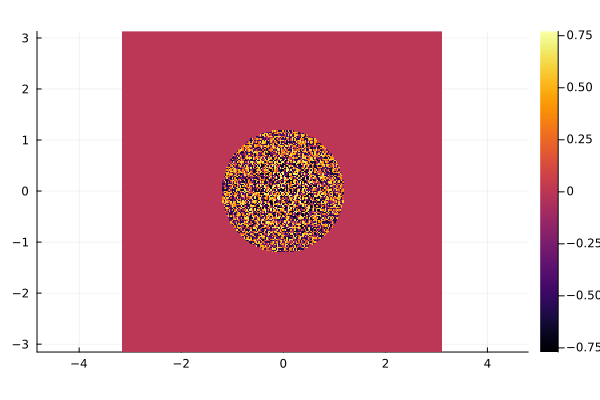

In [10]:

sum(abs.(g))*prod(κ)
kx, ky, kz = get_frequencies(Box_x,J)
kx_p = sort(kx)
ky_p = sort(ky)
kz_p = sort(kz)
heatmap(ky_p,kx_p,real.(g_p[:,:,J[3]÷2]), aspectratio = 1)
#surface(ky_p,kx_p,real.(g[:,:]), aspectratio = 1)


In [11]:
#ifft(g,J...)
p_i = plan_ifft(g; flags=FFTW.ESTIMATE, timelimit=Inf);

In [14]:
ϕ = p_i*g*sqrt(prod(J));
ϕ_t = p_i*g_t*sqrt(prod(J));


In [15]:

sum(ϕ.*conj.(ϕ))/prod(J)

0.01293642409324206 + 0.0im

In [16]:

@show norm(ϕ)
@show mean(ϕ)
@show var(ϕ);
@show n(ϕ,ϕ_t,Box_x,J);

norm(ϕ) = 422.8866593603755
mean(ϕ) = -0.00018430092155510266 + 9.52421546877913e-5im
var(ϕ) = 0.012936381991135865
n(ϕ, ϕ_t, Box_x, J) = (292519.29005943483, 0.021160249570271617)


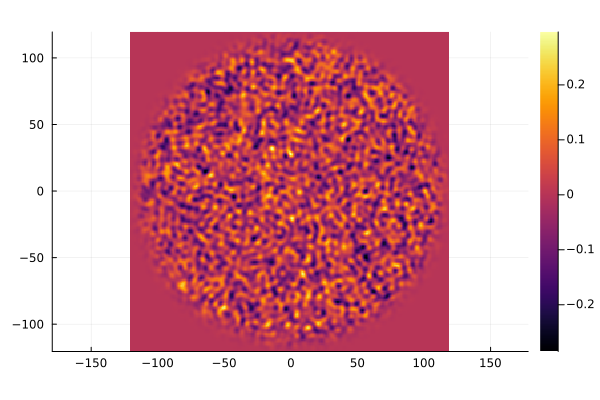

In [17]:
p = 4 #polinomial order
percent = 0.550 #0.6 goes up to the border in poli_cut use 0.550 for step_cut
δ = 0.3 #less than 1!
x,y,z = get_coords(Box_x,J)
#ϕ_h_cut = polinomial_cut(ϕ,Box_x,J,p,percent);
ϕ_h_step_cut = step_cut(ϕ,Box_x,J,p,percent,δ)
heatmap(x,y,real.(ϕ_h_step_cut[:,:,J[3]÷2]), aspectratio=1)
#heatmap(real.(ϕ_h_cut[J[1]÷2,:,:]), aspectratio=1)
#heatmap(real.(ϕ_h_cut[:,J[2]÷2,:]), aspectratio=1)
#heatmap(imag.(ϕ[:,J[2]÷2,:]), aspectratio=1)
#surface(x,y,real.(ϕ_h_step_cut[:,:,J[3]÷2]), aspectratio=1)
#png("h_cut.png")

In [18]:
#ϕ_h_cut = polinomial_cut(ϕ,Box_x,J,8);
#ϕ_t_h_cut = polinomial_cut(ϕ_t,Box_x,J,8);

ϕ_h_cut = step_cut(ϕ,Box_x,J,p,percent,δ)
ϕ_t_h_cut = step_cut(ϕ_t,Box_x,J,p,percent,δ)

N_fields = 4.0 #Int32(1)

x, y, z = get_coords(Box_x,J)

# Open an HDF5 file in write mode
h5file = h5open("example_data_3d_h_step_cut.h5", "w") do file
    write(file, "coord0", x)
    write(file, "coord1", y)
    write(file, "coord2", z)
    write(file, "nvars", [N_fields])
    write(file, "var0", real.(ϕ_h_cut))
    write(file, "var1", imag.(ϕ_h_cut))
    write(file, "var2", real.(ϕ_t_h_cut))
    write(file, "var3", imag.(ϕ_t_h_cut))
end

In [27]:
data = h5open("example_data_3d_h_step_cut.h5", "r")

🗂️ HDF5.File: (read-only) example_data_3d_h_step_cut.h5
├─ 🔢 coord0
├─ 🔢 coord1
├─ 🔢 coord2
├─ 🔢 nvars
├─ 🔢 var0
├─ 🔢 var1
├─ 🔢 var2
└─ 🔢 var3

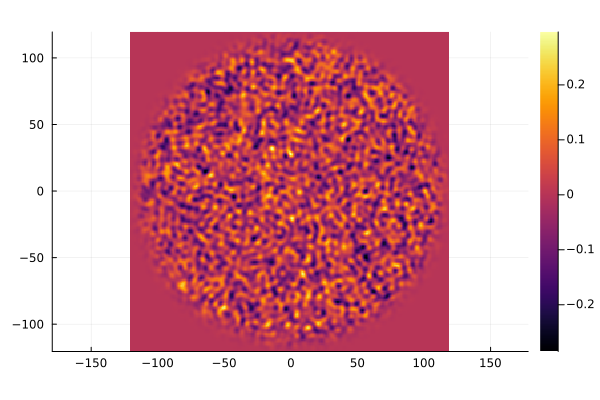

In [28]:
var0 = read(data["var0"])
heatmap(x,y,var0[:,:,J[3]÷2], aspectratio=1)
#heatmap(x,y,real.(ϕ_h_cut)[:,:,J[3]÷2], aspectratio=1)

In [42]:
### Derivatives

using SummationByPartsOperators

Dx = periodic_derivative_operator(derivative_order=1, accuracy_order=2, xmin=Box_x[1], xmax=Box_x[2], N=J[1])
Dy = periodic_derivative_operator(derivative_order=1, accuracy_order=2, xmin=Box_x[3], xmax=Box_x[4], N=J[2])
Dz = periodic_derivative_operator(derivative_order=1, accuracy_order=2, xmin=Box_x[3], xmax=Box_x[4], N=J[3])

Dϕ = Array{ComplexF64}(undef, 3, J...)
for i in 1:J[1]
    for j in 1:J[2]
        Dϕ[3,i,j,:] = Dz*ϕ_h_cut[i,j,:]
    end
end
for j in 1:J[2]
    for k in 1:J[3]
        Dϕ[1,:,j,k] = Dx*ϕ_h_cut[:,j,k]
    end
end
for i in 1:J[1]
    for k in 1:J[3]
        Dϕ[2,i,:,k] = Dy*ϕ_h_cut[i,:,k]
    end
end



h5file = h5open("derivatives_3d_h_step_cut.h5", "w") do file
    write(file, "coord0", x)
    write(file, "coord1", y)
    write(file, "coord2", z)
    write(file, "nvars", [6])
    write(file, "var0", real.(Dϕ[1,:,:,:]))
    write(file, "var1", real.(Dϕ[2,:,:,:]))
    write(file, "var2", real.(Dϕ[3,:,:,:]))
    write(file, "var3", imag.(Dϕ[1,:,:,:]))
    write(file, "var4", imag.(Dϕ[2,:,:,:,:]))
    write(file, "var5", imag.(Dϕ[3,:,:,:,]))
end


In [43]:
ddata = h5open("derivatives_3d_h_step_cut.h5", "r")

🗂️ HDF5.File: (read-only) derivatives_3d_h_step_cut.h5
├─ 🔢 coord0
├─ 🔢 coord1
├─ 🔢 coord2
├─ 🔢 nvars
├─ 🔢 var0
├─ 🔢 var1
├─ 🔢 var2
├─ 🔢 var3
├─ 🔢 var4
└─ 🔢 var5

## Thermal distribution

We use a relativistic thermal distribution. I guess we are setting the mass to 1 but I don't know the temperature.



In [29]:
θ = 1.0
m = 1.0
m2 = m^2
norm_rel = 2.0
p_max = 10*θ
Box_p =(-p_max,p_max,-p_max,p_max,-p_max,p_max)
#dp = differentials(Box_p,J)
L = zeros(J...)
L = Box_p[2:2:end] .- Box_p[1:2:end]
f_p = f_p_rel 
f_p_max = f_p_rel_max
par_f_p_1 = (θ,norm_rel,2)
#norm_rel = int_mid_point_f(f_p, par_f_p_1, [20_000,20_000], Box_p)
par_f_p = (θ, norm_rel,2)
interval_p = Box_p


(-10.0, 10.0, -10.0, 10.0, -10.0, 10.0)

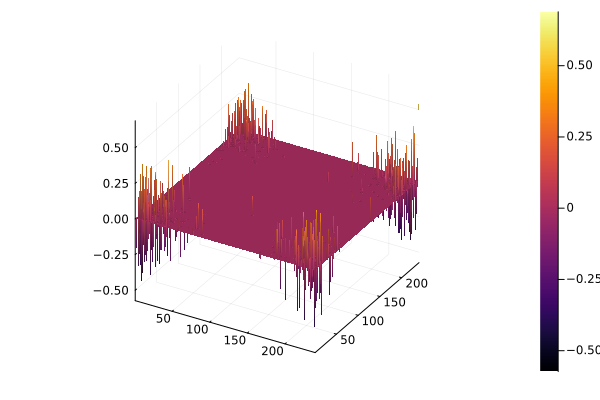

In [31]:
g_th = fill(0.0+im*0.0,J...)
gt_th = fill(0.0+im*0.0,J...)

N=100000
plt = Plots.scatter(labels=false)
for i in 1:N÷2
    kr = random_sampling_from_distribution_D(f_p,f_p_max,par_f_p,interval_p)
    j = get_index_p(kr,J,L)
    jm = get_index_p(-kr,J,L)
    if (abs(j[1]) > J[1] || abs(jm[1])) > J[1] || (abs(j[2]) > J[2] || abs(jm[2])) > J[2]
        println("j = $j, jm = $jm, kr = $kr")
    end
    #Plots.scatter!(plt,[j[1],jm[1]],[j[2],jm[2]],label=false)
    factor = 1.0/sqrt(2*ω([kr[1],kr[2],kr[3]],m2))
    phase_p = exp(im*rand()*2*π)
    phase_m = exp(im*rand()*2*π)
    g_th[j...] += phase_p*factor
    g_th[jm...] += phase_m*factor
    gt_th[j...] += im*phase_p/factor/2.0
    gt_th[jm...] += 2.0*im*phase_m/factor/2.0
end

#heatmap(real.(g_th))
surface(real.(g_th[30,:,:]))
#plt

In [32]:
ϕ_th = p_i*g_th*sqrt(prod(J));
ϕt_th = p_i*gt_th*sqrt(prod(J));

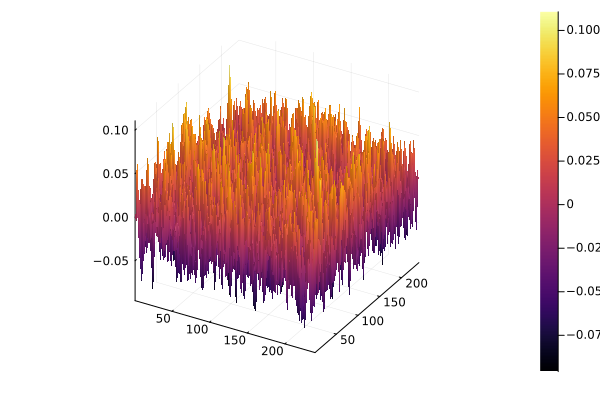

In [33]:
#heatmap(imag.(ϕ_th))
surface(imag.(ϕ_th[30,:,:]))

In [34]:
#@show sum(ϕ.*conj.(ϕ))*prod(dx)/V

n(ϕ_th,ϕt_th,Box_x,J)

(74874.94725090187, 0.005416301161089545)

### Localization



In [36]:
#ϕ_th_cut = polinomial_cut(ϕ_th,Box_x,J,8);
#ϕ_th_step_cut = poli_step
p = 4 #polinomial order
percent = 0.550 #0.6 goes up to the border in poli_cut use 0.550 for step_cut
δ = 0.3 #less than 1!
#x,y,z = get_coords(Box_x,J)

ϕ_th_step_cut = step_cut(ϕ_th,Box_x,J,p,percent,δ)
ϕ_t_th_step_cut = step_cut(ϕt_th,Box_x,J,p,percent,δ)

240×240×240 Array{ComplexF64, 3}:
[:, :, 1] =
  0.0-0.0im   0.0+0.0im  -0.0+0.0im  …  -0.0+0.0im  -0.0+0.0im   0.0+0.0im
  0.0-0.0im   0.0+0.0im   0.0+0.0im     -0.0+0.0im  -0.0+0.0im   0.0+0.0im
  0.0-0.0im   0.0+0.0im   0.0+0.0im     -0.0+0.0im  -0.0+0.0im  -0.0+0.0im
  0.0-0.0im   0.0+0.0im  -0.0+0.0im     -0.0+0.0im  -0.0-0.0im  -0.0-0.0im
  0.0-0.0im   0.0-0.0im   0.0+0.0im     -0.0-0.0im  -0.0-0.0im  -0.0-0.0im
  0.0-0.0im   0.0-0.0im   0.0-0.0im  …   0.0-0.0im  -0.0-0.0im  -0.0-0.0im
  0.0-0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im  -0.0+0.0im  -0.0+0.0im
  0.0+0.0im   0.0+0.0im  -0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0-0.0im   0.0+0.0im  -0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
 -0.0+0.0im  -0.0+0.0im  -0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
     ⋮                               ⋱                          
 -0.0-0.0im  -0.0-0.0im  -0.0-0.0im      0.0+0.0im  -0.0+0.0im  -0.0+0.0im
 -0.0+0.0im  -0.0+0.0im  -0.0-0.0im      0.0+0.0im  -0.0+0.0im  

In [ ]:
surface(real.(ϕ_th_step_cut[101,:,:]) )

### Data transfer

In [25]:
N_fields = 4.0 #Int32(1)

x, y, z = get_coords(Box_x,J)

# Open an HDF5 file in write mode
h5file = h5open("example_data_3d_gaussian.h5", "w") do file
    write(file, "coord0", x)
    write(file, "coord1", y)
    write(file, "coord2", z)
    write(file, "nvars", [N_fields])
    write(file, "var0", real.(ϕ))
    write(file, "var1", imag.(ϕ))
    write(file, "var2", real.(ϕ_t))
    write(file, "var3", imag.(ϕ_t))
end